# Model Evalutation w Confusion Matrix
Full text [here](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb)

[Pime Indian Diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [10]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Can we predict the diabetes status of a patient given their health measurements?

In [21]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [30]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [33]:
# calculate accuracy
from sklearn import metrics

#Built in method for determining: correctly_predicted / total_observations
print(metrics.accuracy_score(y_test, y_predictions))

0.692708333333


In [34]:
#Explore Test Data

#examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

# calculate the percentage of ones (diabetes)
y_test.mean()    
# calculate the percentage of zeros (no diabetes)
1 - y_test.mean()

0.6770833333333333

**Null accuracy**: accuracy that could be achieved by always predicting the most frequent class ("B Has The Highest Frequency")

In [35]:
# Null Accuracy
# What if a monkey just selected 1 every time, how accurate could we be?
max(y_test.mean(), 1 - y_test.mean())
instances_w_most_frequent_value = y_test.value_counts().head(1)
total_instances = len(y_test) #size of dataset
instances_w_most_frequent_value / total_instances

0    0.677083
Name: label, dtype: float64

In [36]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_predictions[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Confusion matrix

In [37]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_predictions))

[[118  12]
 [ 47  15]]


![](https://github.com/justmarkham/scikit-learn-videos/raw/0e26828604b503f0d66a5966de1dce57e5e88c2a/images/09_confusion_matrix_1.png)

In [40]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]   #True positive
TN = confusion[0, 0]   #True negative
FP = confusion[0, 1]   #False positive
FN = confusion[1, 0]   #False negative

#### Classification Accuracy

In [41]:
#How often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


#### Classification Error

In [42]:
#How often is the classifier incorrect?
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


#### Sensitivity ("Recall")

In [43]:
#When the actual value is positive, how often is the prediction correct?
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


#### Specificity

In [45]:
#When the actual value is negative, how often is the prediction correct?
print(TN / float(TN + FP))

0.907692307692


#### False Positive Rate

In [47]:
#When the actual value is negative, how often is the prediction incorrect?
print(FP / float(TN + FP))

0.0923076923077


#### Precision

In [48]:
#When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


### Adjusting the classification threshold

In [49]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [51]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

#Each row represents an (instance, row, record, observation)
#Below is the predicted probability for the two cases given a sample:
#Column 1 is NOT_DIABETIC, Column 2 is DIABETIC (probabilities)

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [52]:
# store the predicted probabilities for class 1 (Diabetes)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]    #all the rows, 1st column

In [53]:
# allow plots to appear in the notebook
%matplotlib inline                #NEED TO DO THIS BEFORE IMPORTING matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['font.size'] = 14

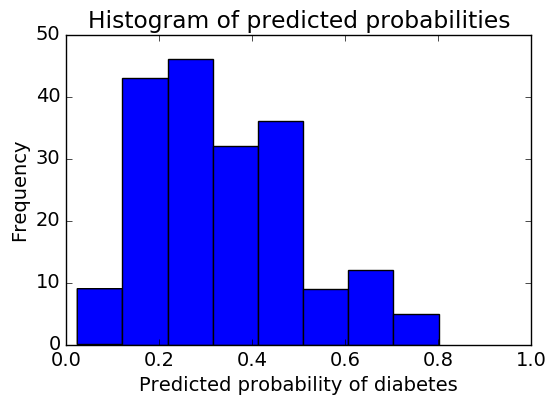

In [55]:
# histogram of predicted probabilities
# this chart includes the probability of being diabetic for ALL patients
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)   #range of x values
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

What is Threshold?
The lowest probability value at which you're comfortable asserting a positive classification (e.g. If our predicted probability of being diabetic is > 50%, return True, else return False    

In [59]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

#Threshold defaults to .5 in Scikit, so we are going to change it to .3
y_pred_class = binarize([y_pred_prob], 0.3)[0]

#This means we will return True (IS_DIABETIC) if the probability is above .3 or 30%

In [60]:
#compare old and new Confusion Matrixes

# previous confusion matrix (default threshold of 0.5)
print(confusion)

# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]
[[80 50]
 [16 46]]


In [61]:
# sensitivity (recall) has increased (used to be 0.24)
print(46 / float(46 + 16))

# specificity (precision) has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.741935483871
0.615384615385


### ROC Curves
How sensitivity and specificity are affected by various thresholds

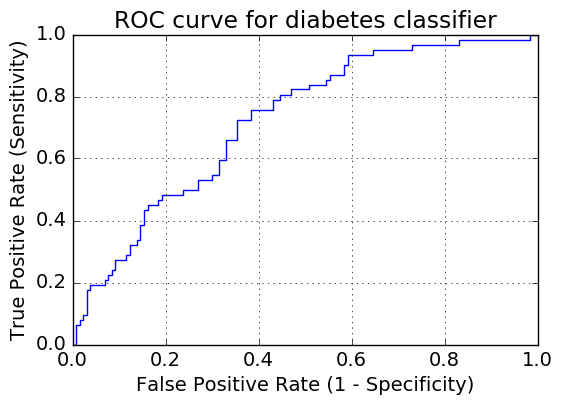

In [66]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#You can't actually see the thresholds used to generate the ROC curve

In [67]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [68]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [69]:
evaluate_threshold(0.3)

Sensitivity: 0.725806451613
Specificity: 0.615384615385


### Area Under the Curve (AUC)

AUC is the percentage of the ROC plot that is underneath the curve

In [70]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


In [71]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183